In [30]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [31]:
df = pd.read_csv("vgsales.csv")
df.head(500)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
495,496,Sonic Mega Collection Plus,PS2,2004.0,Misc,Sega,1.54,1.14,0.00,0.22,2.90
496,497,Sega Superstars Tennis,X360,2008.0,Sports,Sega,1.75,0.86,0.00,0.28,2.90
497,498,World Soccer Winning Eleven 7 International,PS2,2003.0,Sports,Konami Digital Entertainment,0.08,1.24,1.13,0.45,2.90
498,499,Need for Speed: Most Wanted,PS3,2012.0,Racing,Electronic Arts,0.71,1.51,0.06,0.61,2.89


In [ ]:
#Data Cleaning and Preprocessing

In [32]:
df = df.dropna(subset=["Name", "Genre", "Global_Sales"])

df = df[df["Global_Sales"] > 0].copy()

df["Name"] = df["Name"].astype(str).str.strip().str.lower()
df["Genre"] = df["Genre"].astype(str).str.strip().str.lower()
df["Platform"] = df["Platform"].astype(str).str.strip().str.upper()

df = df.sort_values("Global_Sales", ascending=False).head(500).reset_index(drop=True)

df.shape

(500, 11)

In [32]:
df = df.dropna(subset=["Name", "Genre", "Global_Sales"])

df = df[df["Global_Sales"] > 0].copy()

df["Name"] = df["Name"].astype(str).str.strip().str.lower()
df["Genre"] = df["Genre"].astype(str).str.strip().str.lower()
df["Platform"] = df["Platform"].astype(str).str.strip().str.upper()

df = df.sort_values("Global_Sales", ascending=False).head(500).reset_index(drop=True)

df.shape

(500, 11)

In [ ]:
#Normalization

In [41]:
def normalize_name(s: str) -> str:
    return (str(s)
            .replace("’", "'")
            .replace("‘", "'")
            .replace("´", "'")
            .replace("`", "'")
            .replace("'", "")
            .strip()
            .lower())

df["Name_norm"] = df["Name"].apply(normalize_name)


In [ ]:
#Define the shows/videos keywords to identify the titles that are adapted

In [42]:
adapted_keywords = [
    "the last of us", "super mario", "pokemon", "gran turismo",
    "animal crossing", "final fantasy", "donkey kong", "minecraft",
    "pac-man","fallout", "uncharted", "world of warcraft", "sonic",
    "tomb raider", "street fighter", "halo", "the witcher",
    "resident evil","assassins creed"  
]

df["Is_Adapted"] = df["Name_norm"].apply(lambda name: any(k in name for k in adapted_keywords))

In [ ]:
#Count the keywords

In [43]:
for kw in adapted_keywords:
    matches = df[df["Name_norm"].str.contains(kw, regex=False)]
    print(f"{kw:20} → {len(matches)} match(es)")


the last of us       → 2 match(es)
super mario          → 27 match(es)
pokemon              → 14 match(es)
gran turismo         → 8 match(es)
animal crossing      → 5 match(es)
final fantasy        → 9 match(es)
donkey kong          → 7 match(es)
minecraft            → 3 match(es)
pac-man              → 2 match(es)
fallout              → 6 match(es)
uncharted            → 5 match(es)
world of warcraft    → 2 match(es)
sonic                → 10 match(es)
tomb raider          → 3 match(es)
street fighter       → 4 match(es)
halo                 → 8 match(es)
the witcher          → 1 match(es)
resident evil        → 8 match(es)
assassins creed      → 14 match(es)


In [ ]:
#Bar Chart - Average Global Sales Comparison

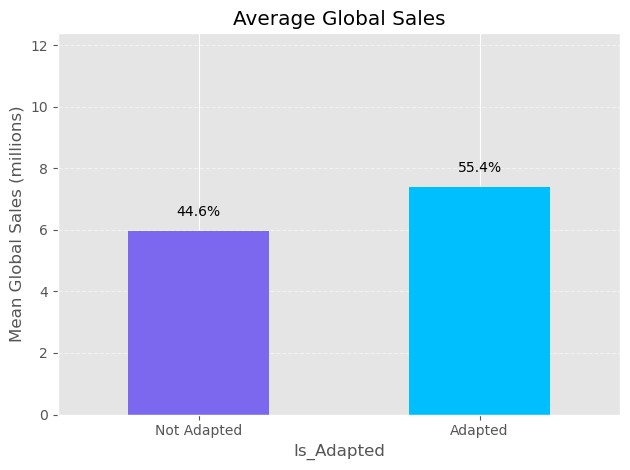

In [73]:
avg_sales = summary_question1["mean"]
total_avg = avg_sales.sum()
percentages = (avg_sales / total_avg) * 100

plt.figure()
avg_sales.plot(kind='bar', color=['mediumslateblue', 'deepskyblue'])
plt.title("Average Global Sales")
plt.ylabel("Mean Global Sales (millions)")
plt.xticks([0, 1], ['Not Adapted', 'Adapted'], rotation=0)
plt.ylim(0, max(avg_sales) + 5)
plt.grid(axis='y', linestyle='--', alpha=0.5)


for i, (v, pct) in enumerate(zip(avg_sales, percentages)):
    plt.text(i, v + 0.5, f"{pct:.1f}%", ha='center')

plt.tight_layout()
plt.savefig("filename.png", dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
#Pie Chart - Proportion of Adapted vs Not Adapted Games

Index(['Not Adapted', 'Adapted'], dtype='object', name='Is_Adapted')


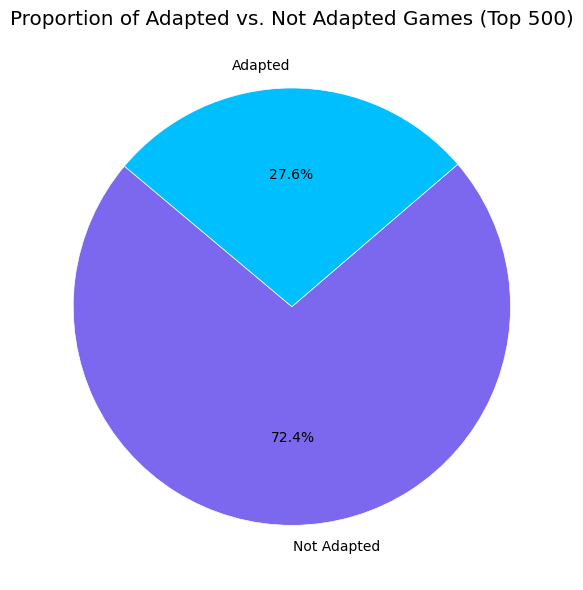

In [76]:

counts = df["Is_Adapted"].value_counts().rename(index={True: "Adapted", False: "Not Adapted"})


print(counts.index) 


colors = ["mediumslateblue", "deepskyblue"]

plt.figure(figsize=(6, 6))
plt.pie(
    counts.values,
    labels=counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'white'}
)
plt.title("Proportion of Adapted vs. Not Adapted Games (Top 500)")
plt.tight_layout()
plt.savefig("filename.png", dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
#Bar Chart - Adapted Titles by Genre

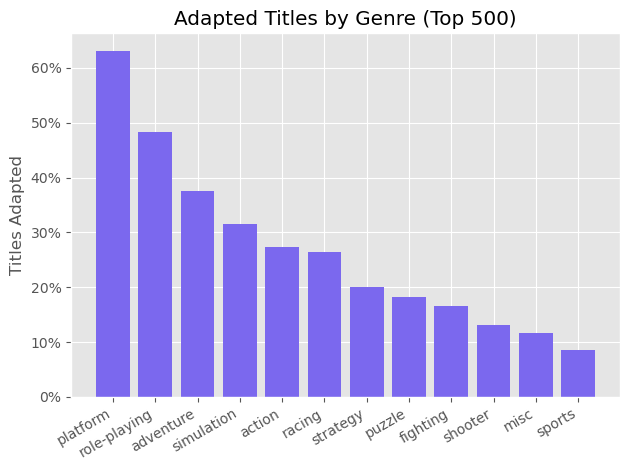

In [78]:
from matplotlib.ticker import PercentFormatter  

plt.figure()
plt.bar(
    genre_share_sorted.index,
    genre_share_sorted["Adapted_share"].values,
    color="mediumslateblue"
)
plt.title("Adapted Titles by Genre (Top 500)")
plt.ylabel("Titles Adapted")
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1))  
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.savefig("filename.png", dpi=300, bbox_inches='tight')
plt.show()
